In [1]:
import logging
import os

import pandas as pd

from pathlib import Path

from experiments.tad_help import RTRunner

%load_ext autoreload
%autoreload 2

# Disable logging of the program in the notebook
os.environ["LOGLEVEL"] = "DEBUG"

logging.basicConfig(filename="runtime.log")
logging.root.setLevel(logging.DEBUG)
logging.basicConfig(level=logging.DEBUG)

logger = logging.getLogger('__main__')
logger.handlers.clear()

fh = logging.FileHandler('runtime.log')
fh.setLevel(logging.DEBUG)
logger.addHandler(fh)

pybooklogger = logging.getLogger('pybook')
pybooklogger.setLevel(logging.DEBUG)

%aimport setup

from setup import *

# Track Layout
Calculate the layout of the dutch railway system


In [2]:
layout_file =   "../data/prorail/parsed/netherlands-schiphol.json"
layout = Layout(layout_file)

--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\erick\AppData\Local\Programs\Python\Python39\lib\logging\__init__.py", line 1086, in emit
    stream.write(msg + self.terminator)
  File "C:\Users\erick\AppData\Local\Programs\Python\Python39\lib\encodings\cp1252.py", line 19, in encode
    return codecs.charmap_encode(input,self.errors,encoding_table)[0]
UnicodeEncodeError: 'charmap' codec can't encode character '\u258e' in position 5: character maps to <undefined>
Call stack:
  File "C:\Users\erick\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\erick\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\erick\venv\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\erick\venv\lib\site-packages\traitlets\config\application.py", line 1075

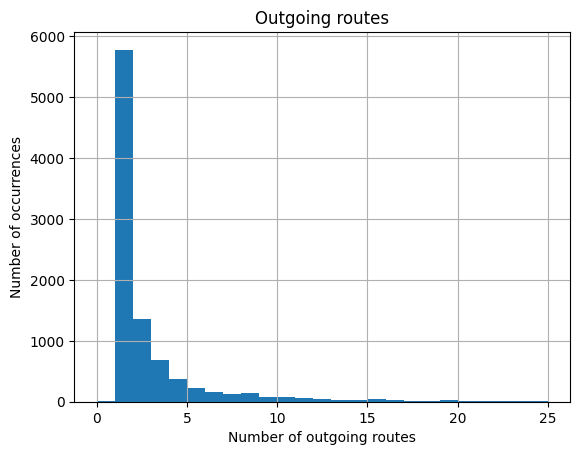

In [3]:
edges_df = pd.DataFrame({"Outgoing routes": [len(n.outgoing) for n in layout.g_block.nodes.values() if len(n.outgoing) <= 25]})
hist = edges_df.hist(bins=25, )
plt.xlabel("Number of outgoing routes")
plt.ylabel("Number of occurrences")
plt.show()

# Experiment Runtime
Take a route of an agent with many stops, and run from start to every stop as an experiment

In [4]:
scenario_files = Path("../data/prorail/scenarios/RT")
save_dir = r"experiments\results\rt"

In [5]:
# i_save_dir = Path(save_dir) / "intermediates"
# Path(i_save_dir).mkdir(parents=True, exist_ok=True)
# 
# processed = {file.split(".csv")[0] for file in os.listdir(i_save_dir)}
# 
# # unprocessed_scenarios = set(os.listdir(scenario_files)) - processed
# unprocessed_scenarios ={r"2025-07-22_1.json"}
# for scenario_file in unprocessed_scenarios:
#     # try:
#         rt_exp = RTRunner(layout, scenario_files / scenario_file, save_dir)
#         experiments = rt_exp.run("3500", "o", "RTB", "ASDZ", timeout=1200)
#         path_df = rt_exp.get_path_df(experiments)
#         path_df.to_csv(i_save_dir / f"{scenario_file}.csv")
# 
#         kwargs = {"min_x": 0, "max_x": 900,
#                   "min_y": 0, "max_y": 3600}
#         experiments[0].metadata = {'color': "Red",    'label': 'route to RTD',  'offset': 0, 'linestyle': 3}
#         experiments[1].metadata = {'color': "Green",  'label': 'route to SDM',  'offset': 0, 'linestyle': 3}
#         experiments[2].metadata = {'color': "Blue",   'label': 'route to DT',   'offset': 0, 'linestyle': 3}
#         experiments[3].metadata = {'color': "Cyan",   'label': 'route to GV',   'offset': 0, 'linestyle': 3}
#         experiments[4].metadata = {'color': "Yellow", 'label': 'route to LAA',  'offset': 0, 'linestyle': 3}
#         experiments[5].metadata = {'color': "Black",  'label': 'route to LEDN', 'offset': 0, 'linestyle': 3}
#         experiments[6].metadata = {'color': "Pink",   'label': 'route to SHL',  'offset': 0, 'linestyle': 3}
#         experiments[7].metadata = {'color': "Gray",   'label': 'route to ASDZ', 'offset': 0, 'linestyle': 3}
#         plot_experiments(experiments, **kwargs)
    # except KeyboardInterrupt:
    #     raise
    # except Exception as e:
    #     print(e)

In [6]:
rt_exp = RTRunner(layout, scenario_files / r"2025-07-22_1.json", save_dir)
# experiments = rt_exp.run("3500", "o", "RTB", "ASDZ", timeout=1200)
# rt_exp.run("3500", "o", "RTB", "ASDZ", timeout=1200)

..\data\prorail\scenarios\RT\2025-07-22_1.json


In [13]:
[edge for edge in rt_exp.scenario.l.g_block.edges if "Rsd|232" in edge.from_node.name]

[Edge from r-Rsd|232 to r-Rsd|188 with length 474,
 Edge from r-Rsd|232 to r-Rsd|186 with length 476,
 Edge from r-Rsd|232 to r-Rsd|186 with length 476,
 Edge from r-Rsd|232 to r-Rsd|184 with length 448,
 Edge from r-Rsd|232 to r-Rsd|182 with length 566,
 Edge from r-Rsd|232 to r-Rsd|116 with length 1347,
 Edge from r-Rsd|232 to r-Rsd|276 with length 1184,
 Edge from r-Rsd|232 to r-Rsd|274 with length 1184,
 Edge from r-Rsd|232 to r-Rsd|268 with length 1122,
 Edge from r-Rsd|232 to r-Rsd|272 with length 1084,
 Edge from r-Rsd|232 to r-Rsd|270 with length 1083,
 Edge from r-Rsd|232 to r-Rsd|266 with length 1291,
 Edge from r-Rsd|232 to r-Rsd|268 with length 1122,
 Edge from r-Rsd|232 to r-Rsd|272 with length 1084,
 Edge from r-Rsd|232 to r-Rsd|270 with length 1083,
 Edge from r-Rsd|232 to r-Rsd|266 with length 1294,
 Edge from r-Rsd|232 to r-Rsd|266 with length 1295,
 Edge from r-Rsd|232 to r-Rsd|266 with length 1296,
 Edge from r-Rsd|232 to r-Rsd|266 with length 1293,
 Edge from r-Rsd|

In [7]:
save_path = Path(save_dir)
dfs = []

for file in (save_path / "intermediates").iterdir():
    df = pd.read_csv(file, index_col=0)
    if len(df) >= 8:
        dfs.append(df)

df = pd.concat(dfs, axis=0, keys=list(range(len(dfs))))
df.index = df.index.map(lambda x: (x[0], x[1].split("|")[0]))
df["Adjusted Search Time"] = df["Search Time"] / df["Total paths"]
df = df.drop(columns=["atfs", "paths"])
df

ValueError: No objects to concatenate

In [ ]:

mean_df = df.groupby(level=1).mean().sort_values("Average path length", ascending=True)
mean_df["std"] = df.groupby(level=1).std()["Search Time"]
mean_df["Adjusted std"] = df.groupby(level=1).std()["Adjusted Search Time"]
mean_df = mean_df[["Average path length", "Search Time", "std", "Adjusted Search Time", "Adjusted std"]]
x = mean_df.set_index("Average path length")
plt.rcParams.update({'font.size': 11})
adjusted = ""
ax = x[f"{adjusted}Search Time"].plot(color="#00A6D6")
ax.fill_between(x.index, x[f"{adjusted}Search Time"] - x[f"{adjusted}std"] / 2, x[f"{adjusted}Search Time"] + x[f"{adjusted}std"] / 2, color="#00A6D6", alpha=0.3)
plt.ylabel("Search Time (s)")
plt.xlabel("Average number of blocks")
plt.tight_layout()
plt.savefig(save_path / "search_time.png")
mean_df

In [ ]:
from scipy.optimize import curve_fit

plt.rcParams.update({'font.size': 11})
fig, ax = plt.subplots()

adjusted = "Adjusted "

df2 = mean_df.set_index("Average path length").drop(index=mean_df.loc["route to LEDN"]["Average path length"])

x2 = df2.index
y = df2[f"{adjusted}Search Time"]
std = df2[f"{adjusted}std"]

def func2(x, a, b):
    return a * x ** 2 + b * x

func = func2

popt, pcov = curve_fit(func, x2, y)

print(popt)

x3 = np.linspace(1, x2.max() + 5)

ax = x[f"{adjusted}Search Time"].plot(color="#00A6D6")
ax.fill_between(x.index, x[f"{adjusted}Search Time"] - x[f"{adjusted}std"] / 2, x[f"{adjusted}Search Time"] + x[f"{adjusted}std"] / 2, color="#00A6D6", alpha=0.3)
_ = ax.plot(x3,  func(x3, *popt), '--', color="#E03C31")
# time_df.loc[time_df["Search Time"] > -1]["Search Time"].plot()
plt.ylabel("Search Time (s)")
plt.xlabel("Number of blocks")
plt.tight_layout()
plt.savefig(str(save_path / "search_time_normalized_fitted.png"))